## 1. Setup & Imports


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

## 2. Configuration


In [8]:
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 30
DATA_DIR = "D:\FALL 2025\Intro_to_Robotics\Final_Project\After_Roboflow"  

## 3. Data Loading


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "train"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "valid"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "test"),
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 2934 images belonging to 4 classes.
Found 280 images belonging to 4 classes.
Found 140 images belonging to 4 classes.


## 4. Model Architecture


In [10]:
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 5. Training


In [11]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 72s 743ms/step - accuracy: 0.4325 - loss: 1.3379 - val_accuracy: 0.6429 - val_loss: 0.9631
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 442ms/step - accuracy: 0.7856 - loss: 0.7784 - val_accuracy: 0.9179 - val_loss: 0.5882
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 439ms/step - accuracy: 0.9189 - loss: 0.5135 - val_accuracy: 0.9500 - val_loss: 0.4024
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 450ms/step - accuracy: 0.9506 - loss: 0.3683 - val_accuracy: 0.9714 - val_loss: 0.2927
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 457ms/step - accuracy: 0.9663 - loss: 0.2817 - val_accuracy: 0.9821 - val_loss: 0.2245
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 453ms/step - accuracy: 0.9765 - loss: 0.2255 - val_accuracy: 0.9821 - val_loss: 0.1849
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 391ms/step - accuracy: 0.9826 - loss: 0.1868 - val_accuracy: 0.9821 - val_loss: 0.1496
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 385ms/step - accuracy: 0.9853 - loss: 0.1580 - val_accu

In [12]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Save history after training

In [13]:
import pickle
with open("history.pkl", "wb") as f:
    pickle.dump(history.history, f)

## reload without training

In [14]:
with open("history.pkl", "rb") as f:
    history_dict = pickle.load(f)

print(history_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy and loss curves

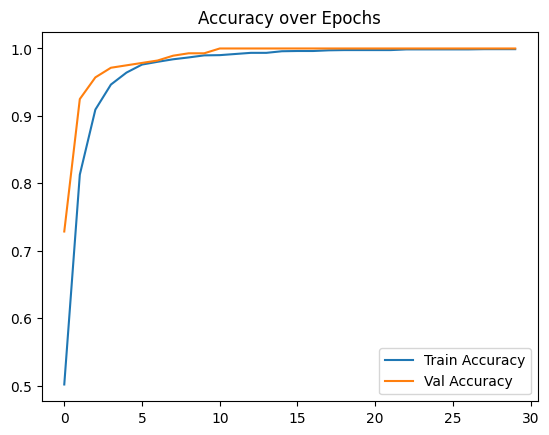

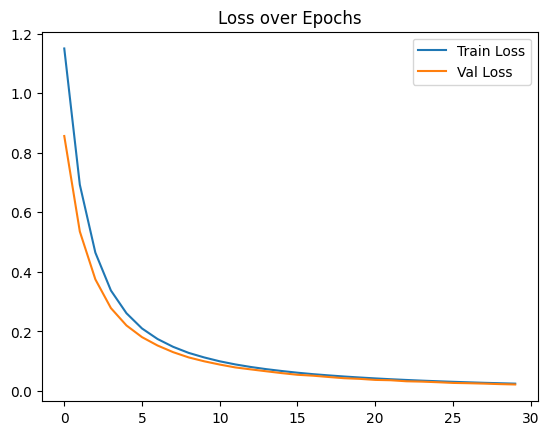

In [ ]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()

## 7. Confusion Matrix


140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


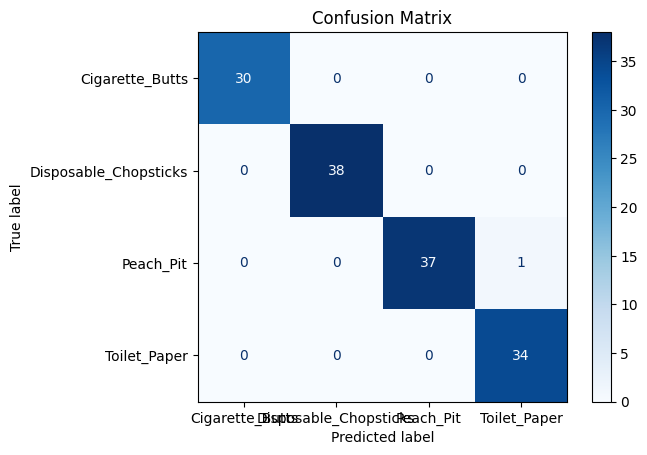

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)
y_true = test_gen.classes

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Found 1 misclassified images.


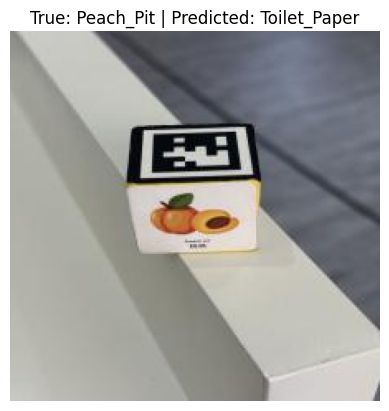

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image 
import os, shutil

# Step 1: Get predictions
predictions = model.predict(test_gen)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())
filepaths = np.array(test_gen.filepaths)

# Step 2: Find misclassified indices
misclassified_indices = np.where(predicted_classes != true_classes)[0]
print(f"Found {len(misclassified_indices)} misclassified images.")

# Step 3: Display misclassified images
for idx in misclassified_indices:
    img_path = filepaths[idx]
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    plt.imshow(img)
    plt.title(f"True: {class_labels[true_classes[idx]]} | Predicted: {class_labels[predicted_classes[idx]]}")
    plt.axis('off')
    plt.show()

## 8. Save Model


In [10]:
model.save("mobilenetv2_hazard_waste.h5")

## 9. Convert to TFLite


In [14]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Enable default optimizations (dynamic quantization)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Specify float16 quantization for weights
converter.target_spec.supported_types = [tf.float16]

# Convert the model
tflite_model = converter.convert()

# Save the converted model to a .tflite file
with open("mobilenetv2_hazard_waste.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\lucky\AppData\Local\Temp\tmpu2zlp4hm\assets


INFO:tensorflow:Assets written to: C:\Users\lucky\AppData\Local\Temp\tmpu2zlp4hm\assets


Saved artifact at 'C:\Users\lucky\AppData\Local\Temp\tmpu2zlp4hm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2191039257712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2191039122240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2191039124352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2191039264928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2191039119952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2191039128224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2191039128576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2191039130160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2191039126464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2191039129456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2191

# Verify the float16 for model compatiblity with pi

In [15]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="mobilenetv2_hazard_waste.tflite")
interpreter.allocate_tensors()

# Inspect details
for detail in interpreter.get_tensor_details():
    print(detail['name'], detail['dtype'])

serving_default_input_layer_1:0 <class 'numpy.float32'>
arith.constant <class 'numpy.float16'>
arith.constant1 <class 'numpy.float16'>
arith.constant2 <class 'numpy.int32'>
arith.constant3 <class 'numpy.float16'>
arith.constant4 <class 'numpy.float16'>
arith.constant5 <class 'numpy.float16'>
arith.constant6 <class 'numpy.float16'>
arith.constant7 <class 'numpy.float16'>
arith.constant8 <class 'numpy.float16'>
arith.constant9 <class 'numpy.float16'>
arith.constant10 <class 'numpy.float16'>
arith.constant11 <class 'numpy.float16'>
arith.constant12 <class 'numpy.float16'>
arith.constant13 <class 'numpy.float16'>
arith.constant14 <class 'numpy.float16'>
arith.constant15 <class 'numpy.float16'>
arith.constant16 <class 'numpy.float16'>
arith.constant17 <class 'numpy.float16'>
arith.constant18 <class 'numpy.float16'>
arith.constant19 <class 'numpy.float16'>
arith.constant20 <class 'numpy.float16'>
arith.constant21 <class 'numpy.float16'>
arith.constant22 <class 'numpy.float16'>
arith.constant

d:\FALL 2025\Intro_to_Robotics\Final_Project\.neta310\lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


## 10. Testing the model on Laptop

In [4]:
import tensorflow as tf
import numpy as np
import cv2

# --- CONFIG ---
TFLITE_MODEL_PATH = "D:\FALL 2025\Intro_to_Robotics\Final_Project\mobilenetv2_hazard_waste.tflite" 
IMG_SIZE = 224
CLASS_NAMES = ["Cigarette_Butts", "Disposable_Chopssticks", "Peach_Pit", "Toilet_Paper"]

# --- LOAD TFLITE MODEL ---
interpreter = tf.lite.Interpreter(model_path=TFLITE_MODEL_PATH)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

def preprocess_frame(frame):
    img = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
    img = img.astype(np.float32) / 255.0
    return np.expand_dims(img, axis=0)

# --- CAMERA LOOP ---
cap = cv2.VideoCapture(0)  # 0 = default laptop webcam

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess
    input_data = preprocess_frame(frame)

    # Run inference
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])[0]

    # Prediction
    predicted_class = np.argmax(output_data)
    confidence = np.max(output_data)

    # Overlay results on frame
    label = f"{CLASS_NAMES[predicted_class]} ({confidence:.2f})"
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                1, (0, 255, 0), 2, cv2.LINE_AA)

    cv2.imshow("Hazard_Waste_Classification", frame)

    # Exit on 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Since the robot is used by everyone I suggest you create your own dir and create your own venv

 cd ~/Neta

 python3 -m venv venv_neta

 source venv_neta/bin/activate

# 11.Prepare the environment on your Pi

sudo apt update && sudo apt upgrade -y

sudo apt install python3-pip

pip3 install numpy opencv-python tflite-runtime

# 12.Transfer Project file from your laptop to pi

scp mobilenetv2_hazard_waste.tflite aupp@pi-ip:/home/aupp/Documents/Neta

scp robot_runtime.py aupp@pi-ip:/home/aupp/Documents/Neta

## Compatible conversion for Raspberry Pi



In [6]:
import tensorflow as tf

# =========================
# 1) Load your Keras .h5 model (Windows path fixed)
# =========================
MODEL_PATH = r"D:\FALL 2025\Intro_to_Robotics\Final_Project\mobilenetv2_hazard_waste.h5"
model = tf.keras.models.load_model(MODEL_PATH, compile=False)

# =========================
# 2) Convert to TFLite (try Built-ins only first)
# =========================
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]

try:
    tflite_model = converter.convert()
    out_name = "mobilenetv2_hazard_waste.tflite"
    print("✅ Converted with TFLITE_BUILTINS only.")
except Exception as e:
    print("⚠️ Built-ins only conversion failed. Trying SELECT_TF_OPS...")
    print("Reason:", e)

    # =========================
    # 3) Fallback: allow Select TF ops (more compatible)
    # =========================
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    converter.target_spec.supported_ops = [
        tf.lite.OpsSet.TFLITE_BUILTINS,
        tf.lite.OpsSet.SELECT_TF_OPS
    ]

    tflite_model = converter.convert()
    out_name = "mobilenetv2_hazard_waste_compatible.tflite"
    print("✅ Converted with SELECT_TF_OPS (compatibility mode).")

# =========================
# 4) Save the converted model
# =========================
with open(out_name, "wb") as f:
    f.write(tflite_model)

print(f"💾 Saved: {out_name}")


INFO:tensorflow:Assets written to: C:\Users\lucky\AppData\Local\Temp\tmpt85sutec\assets


INFO:tensorflow:Assets written to: C:\Users\lucky\AppData\Local\Temp\tmpt85sutec\assets


Saved artifact at 'C:\Users\lucky\AppData\Local\Temp\tmpt85sutec'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2168335682368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2168335694160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2168335991376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2168335689584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2168335691872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2168335688528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2168335995072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2168335997184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2168335993488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2168335996480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2168